# Ukraine invasion shapefile data
*April 14, 2022*

I'm on a distribution list for the Institute for the Study of War's Ukraine invasion map updates, and every day they'll send a new set of zipped shapefiles that CBC uses in maps for digital and broadcast. Let's take a look at how the files are processed.

First, we import a variety of modules that are used in the analysis (primarily, we'll be using geopandas).

In [1]:
import geopandas
import pandas as pd
import fiona
import contextily as cx
import os

Later, we export our files as both GeoJSON (for Datawrapper) and KML (for broadcast maps). We need to add a custom driver so export as KML.

In [2]:
fiona.supported_drivers['KML'] = 'rw'

Now, we read in our data.

In [3]:
assessed_advance = geopandas.read_file("./data/AssessedRussianAdvanceInUkraineAPR14.zip")
claimed_territory = geopandas.read_file("./data/ClaimedRussianTerritoryinUkraineAPR14.zip")
counter = geopandas.read_file("./data/ClaimedUkrainianCounteroffensiveAPR14.zip")
ukraine_control = geopandas.read_file("./data/UkraineCOntrolMapAO14APR2022.zip")

Now, to each dataframe, we add colours that will be used to style the areas in Datawrapper (but will not have an application for the KML versions or the matplotlib version we'll do here).

In [4]:
assessed_advance["color"] = "#C42127"
claimed_territory["color"] = "grey"
counter["color"] = "black"
ukraine_control["color"] = "yellow"

Then, we'll concatenate all these dataframes into one.

In [5]:
data = pd.concat([assessed_advance, claimed_territory, counter, ukraine_control])

data.head()

,GlobalID,CreationDa,Creator,EditDate,Editor,GlobalID_2,geometry,color,FID_Crimea,Shape_Leng,...,begin_,end_,altitudeMo,tessellate,extrude,visibility,drawOrder,icon,Shape__Are,Shape__Len
0,2b95cc1f-a038-4ae0-a189-8e6bf7796d9a,2022-03-02,gbarros_understandingwar,2022-03-02,gbarros_understandingwar,0295a6fe-871c-431c-82f8-44defc2e04fe,"POLYGON Z ((3590906.665 5875597.228 0.000, 358...",#C42127,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,1899-12-30,None,1899-12-30,None,7936ec01-3b68-473c-8006-50c8172e9c76,"POLYGON Z ((3704747.149 6026503.752 0.000, 370...",#C42127,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,1899-12-30,None,1899-12-30,None,bb249eb6-a87b-4604-aac1-d0bbda30f488,"POLYGON Z ((4076350.151 6458460.464 0.000, 408...",#C42127,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,1899-12-30,None,1899-12-30,None,7bfc1494-e26a-40b9-b525-92d5db541714,MULTIPOLYGON Z (((3770009.109 6011464.683 0.00...,#C42127,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,1899-12-30,None,1899-12-30,None,d56a535d-df4c-49bc-a4f4-76dfa419a556,MULTIPOLYGON Z (((3932306.477 6024239.193 0.00...,#C42127,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, let's plot it here before we export, just so we can see what it looks like. We'll also add a basemap so we can see Ukraine.

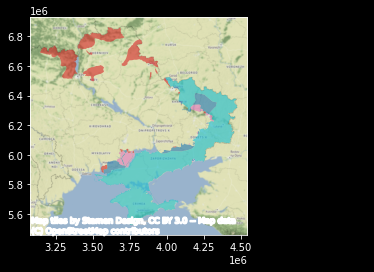

In [6]:
fig = data.plot(column="color", alpha=0.6)
cx.add_basemap(fig)

Before we export, we'll need to change the coordinate system to WGS84. We do this so Datawrapper will accept it.

In [7]:
data = data.to_crs("EPSG:4326")

Now, we export our new file as both GeoJSON and KML. The KML driver doesn't seem to work if there's a file to overwrite, so we wrap it in an if/else block that deletes the old file first, if it exists.

In [8]:
filename = "export/ukraineadvance-export"

data.to_file(f"{filename}.geojson", driver='GeoJSON')

if os.path.exists(f"{filename}.kml"):
    os.remove(f"{filename}.kml")
else:
    data.to_file(f"{filename}.kml", driver='KML')

C:\Users\dexmc\anaconda3\envs\geo\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


That's it! The final Datawrapper product that we keep updated for CBCNews.ca can be viewed [here](https://datawrapper.dwcdn.net/PsIWk/23/).

\-30\-